# Анализ компьютерных игр

Из открытых источников нам доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед нами данные до 2016 года. Мы планируем кампанию на 2017-й. 
<br><br>
Дополнительная информация: в наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Изучение общей информации о данных

Импортируем все необходимые для работы библиотеки. 

In [1]:
%matplotlib inline
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
from pylab import rcParams
rcParams['figure.figsize'] = 11, 7
from math import factorial
from scipy import stats as st

Импортируем датасет и посмотрим на содержащиеся в нем столбцы. 

In [2]:
data = pd.read_csv('/datasets/games.csv')
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


У нас есть следующие столбцы:<br>
• **Name** — название игры<br>
• **Platform** — платформа<br>
• **Year_of_Release** — год выпуска<br>
• **Genre** — жанр игры<br>
• **NA_sales** — продажи в Северной Америке (миллионы долларов)<br>
• **EU_sales** — продажи в Европе (миллионы долларов)<br>
• **JP_sales** — продажи в Японии (миллионы долларов)<br>
• **Other_sales** — продажи в других странах (миллионы долларов)<br>
• **Critic_Score** — оценка критиков (максимум 100)<br>
• **User_Score** — оценка пользователей (максимум 10)<br>
• **Rating** — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта
ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую
возрастную категорию.

Уже сейчас мы видим, что данные импортировались нормально. Все столбцы находятся на своих местах, вся информация читается без проблем. Названия столбцов требуют изменения - их нужно привести к нижнему регистру. <br>
Посмотрим на общую информацию о датасете. 

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


1. У нас есть пропущенные незначительные пропущенные значения в столбцах с названием игры и жанром. Есть пропущенные значения в дате релиза. Значительная нехватка данных есть в столбце с оценками критиков и пользователей, а также с рейтингом ESRB. Это необходимо изучить подробнее и обработать. 
2. Необходимо изменить тип данных в столбце с годом релиза с float на int. Столбец с оценкой пользователей необходимо привести к типу float. Столбцы с рейтингом ESRB, с жанром игры и платформой необходимо привести к типу category. Это уменьшит объем занимаемой памяти и ускорит работу. 

## Вывод

Мы изучили общую информацию по датасету. 
1. Данные получены корректно, читаются нормально. 
2. Названия столбцов необходимо привести к нижнему регистру. 
3. Необходимо обработать пропущенные значения в столбцах: name, year_of_release, genre, critic_score, user_score, rating.
4. Необходимо изменить тип данных в столбцах: year_of_release, user_score, rating, genre, platform. 

## Предобработка данных

### Приведение названий столбцов к нижнему регистру 

In [4]:
data.columns = data.columns.str.lower()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Обработка пропущенных значений 

Необходимо обработать пропущенные значения в столбцах: name, year_of_release, genre, critic_score, user_score, rating.

Столбцы с оценкой критиков и пользователей мы заполнять не будем, потому что пропущенных значений в этих столбцах слишком много, а присваивать играм несуществующие оценки не совсем разумно. Оценивать меньшую выборку разумнее, чем оценивать искаженные данные. 
<br>
При передаче информации по датасету, нам сообщили, что у нас есть странные значения в столбцах с рейтингами. Выведем уникальные значения по столбцам и посмотрим, в чем там проблема.

In [5]:
print(data['critic_score'].unique())
print()
print(data['user_score'].unique())
print()
print(data['rating'].unique())
print()

[76. nan 82. 80. 89. 58. 87. 91. 61. 97. 95. 77. 88. 83. 94. 93. 85. 86.
 98. 96. 90. 84. 73. 74. 78. 92. 71. 72. 68. 62. 49. 67. 81. 66. 56. 79.
 70. 59. 64. 75. 60. 63. 69. 50. 25. 42. 44. 55. 48. 57. 29. 47. 65. 54.
 20. 53. 37. 38. 33. 52. 30. 32. 43. 45. 51. 40. 46. 39. 34. 35. 41. 36.
 28. 31. 27. 26. 19. 23. 24. 21. 17. 22. 13.]

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']

['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']



В столбце user_score мы видим нестандартное значение tbd. Из поиска в сети можно узнать, что это значит "Будет рассчитан". То есть рейтинг на текущий момент неизвестен. Заменим эти значения на нетипичные "-2" для удобства анализа. (Значение "-2" будет отличаться от нетипичного "-1", характерного для пропусков значений. Здесь у нас значение не пропущено, а не определено, то есть это не является возможной ошибкой заполнения и тд.)

In [6]:
for i in range(len(data)):
    if data.loc[i, 'user_score'] == 'tbd':
        data.loc[i, 'user_score'] = '-2'
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '-2', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Отлично. Теперь обратимся к столбцу rating. Т.к. возрастная категория для всех платформ в рамках одной игры у нас не меняется, мы можем смело заменять пропущенные значения по названию игры.  

In [7]:
for i in range(len(data)):
    if data.loc[i, 'rating'] != data.loc[i, 'rating']:
        data_name = data[data['name'] == data.loc[i, 'name']].sort_values(by='rating')
        data_name = data_name.reset_index()
        for j in range(len(data_name)):
            if data_name.loc[j, 'rating'] == data_name.loc[j, 'rating']:
                data.loc[i, 'rating'] = data_name.loc[j, 'rating']

Аналогичным образом заполним значения в столбце с годом релиза, потому что игра с одним названием выходит, как правило, в один год. 

In [8]:
for i in range(len(data)):
    if data.loc[i, 'year_of_release'] != data.loc[i, 'year_of_release']:
        data_year = data[data['name'] == data.loc[i, 'name']].sort_values(by='year_of_release')
        data_year = data_year.reset_index()
        for j in range(len(data_year)):
            if data_year.loc[j, 'year_of_release'] == data_year.loc[j, 'year_of_release']:
                data.loc[i, 'year_of_release'] = data_year.loc[j, 'year_of_release']
                         
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16569 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             10386 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


У нас заполнились не все пропущенные значения, но часть. Остальные пропущенные значения в этих столбцах мы заменить не можем, потому что заполнение значений возрастного ограничения и года релиза не по названию игры было бы некорректным. 

Посмотрим на пропущенные значения в столбце name. У нас их всего два. Надо понять, можем ли мы что-то с ними сделать.

In [9]:
data[data['name'] != data['name']]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Интересно, что это те же две строки, в которых есть пропуски в столбце genre (их у нас тоже всего два на весь датасет). При этом здесь пропуски в столбцах с оценками. Смело отбросим эти строки, потому что они не смогут дать нам никакой ценной информации.

In [10]:
data.dropna(subset=['name'], inplace=True)
data = data.reset_index(drop=True)

Оставшиеся пропущенные значения мы заполним нетипичными (-1), чтобы упростить дальнейший анализ. 

In [11]:
data = data.fillna('-1')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16713 non-null object
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       16713 non-null object
user_score         16713 non-null object
rating             16713 non-null object
dtypes: float64(4), object(7)
memory usage: 1.4+ MB


Пропущенных значений в столбцах не осталось. При анализе мы будем делать срезы, значения в которых != '-1'.

### Изменение типов данных

Необходимо изменить тип данных в столбцах: year_of_release, user_score, critic_score, rating, genre, platform. 

In [12]:
data['year_of_release'] = data['year_of_release'].astype(int).astype('category')
data['user_score'] = data['user_score'].astype(float)
data['critic_score'] = data['critic_score'].astype(float)
data['rating'] = data['rating'].astype('category')
data['genre'] = data['genre'].astype('category')
data['platform'] = data['platform'].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null category
year_of_release    16713 non-null category
genre              16713 non-null category
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       16713 non-null float64
user_score         16713 non-null float64
rating             16713 non-null category
dtypes: category(4), float64(6), object(1)
memory usage: 983.2+ KB


Мы изменили типы данных на удобные для анализа и сократили объем занимаемой памяти на 30%. 

### Проверка дубликатов

In [13]:
data.duplicated().sum()

0

Дубликаты мы не обнаружили. 

### Добавление необходимых столбцов

Добавим столбец с общим доходом по всем регионам. 

In [14]:
data['total_profit'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 12 columns):
name               16713 non-null object
platform           16713 non-null category
year_of_release    16713 non-null category
genre              16713 non-null category
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       16713 non-null float64
user_score         16713 non-null float64
rating             16713 non-null category
total_profit       16713 non-null float64
dtypes: category(4), float64(7), object(1)
memory usage: 1.1+ MB


## Вывод

Мы привели названия столбцов к нижнему регистру, обработали пропуски, изменили типы данных и добавили необходимые столбцы. <br>
Во время предобработки данных мы обнаружили значения tbd в столбце user_score, которые означают, что рейтинг еще не посчитан. Такие значения мы заменили на "-2". <br>
Пропущенные значения, которые нельзя заполнить логически, мы заполнили значениями, равными "-1". <br>

## Исследовательский анализ данных

Мы привели наши данные к удобному для анализа виду и теперь можем приступить к исследовательскому анализу. Для начала, посмотрим, данными за какой период мы обладаем и как много игр выпускалось ежегодно. 

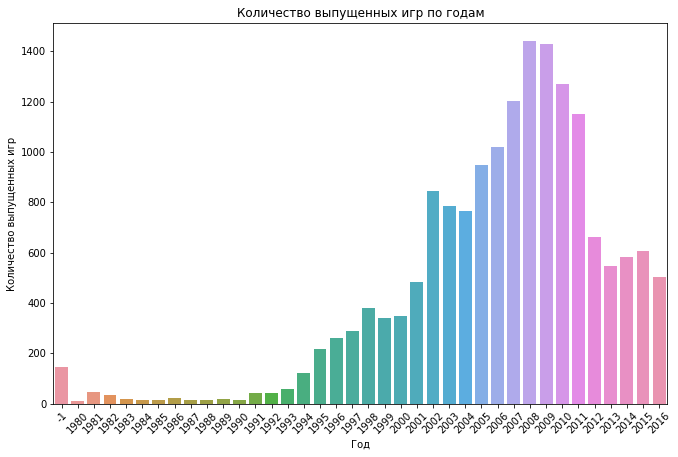

In [15]:
data_game_for_year = data.pivot_table(index='year_of_release', values='name', aggfunc='count')
data_game_for_year = data_game_for_year.reset_index()
sns.barplot(x='year_of_release', y='name', data=data_game_for_year)\
    .set(xlabel='Год', ylabel='Количество выпущенных игр', title='Количество выпущенных игр по годам');
plt.xticks(rotation=45);

На графике видно, что до 1990 года включительно игр выпускалось очень мало (пик на -1 - это наши нетипичные значения). А с 2008 года количество выпускаемых игр уверенно падает. Мы смело можем отсеивать данные до 1990 года. Сделаем это чуть позже. Проанализируем, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. Ответим на вопрос: За какой характерный срок появляются новые и исчезают старые платформы?

In [16]:
data_platform = data.groupby('platform').agg(total_profit=('total_profit', sum))\
    .sort_values(by='total_profit', ascending=False).reset_index()
data_platform

,platform,total_profit
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12
5,PS,730.86
6,GBA,317.85
7,PS4,314.14
8,PSP,294.05
9,PC,259.52


Возьмем первые 10 платформ из списка. 

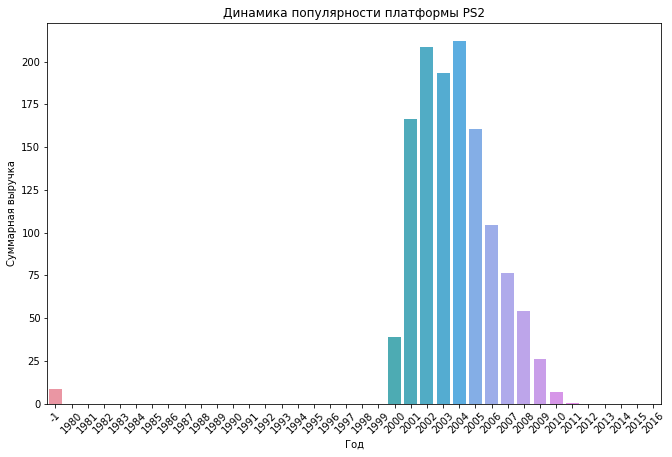

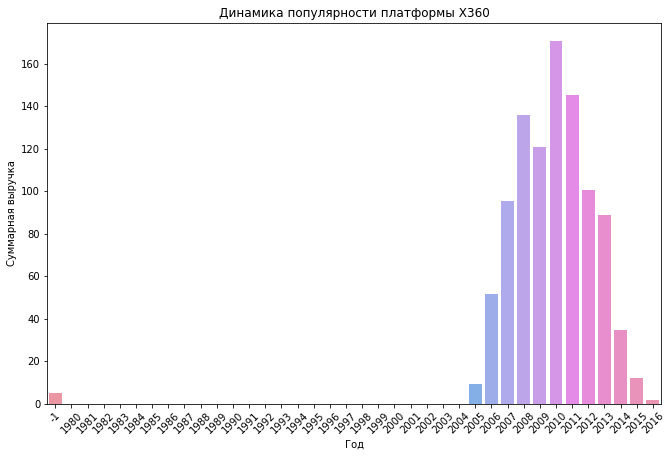

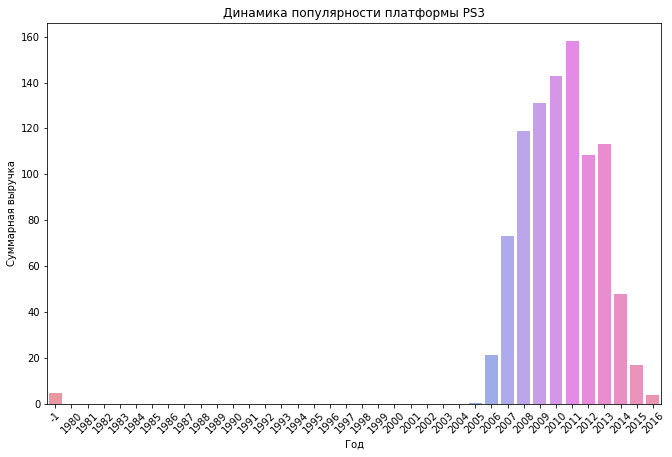

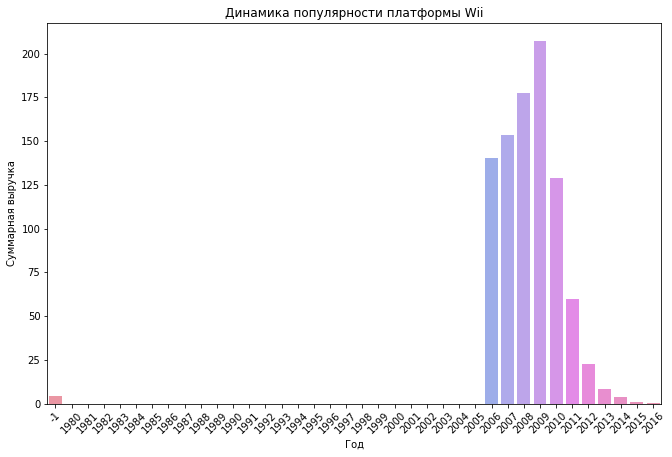

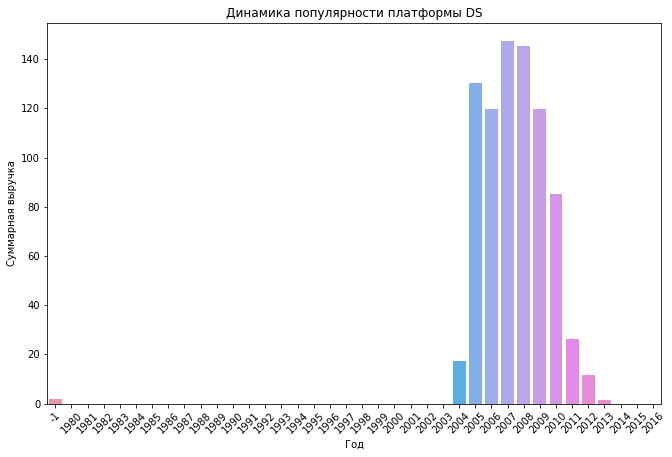

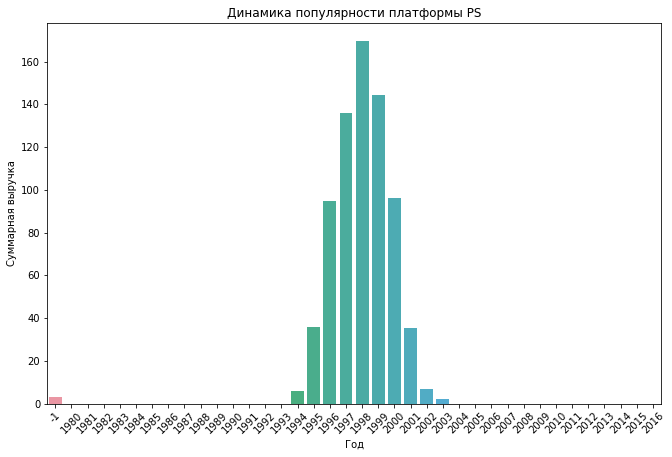

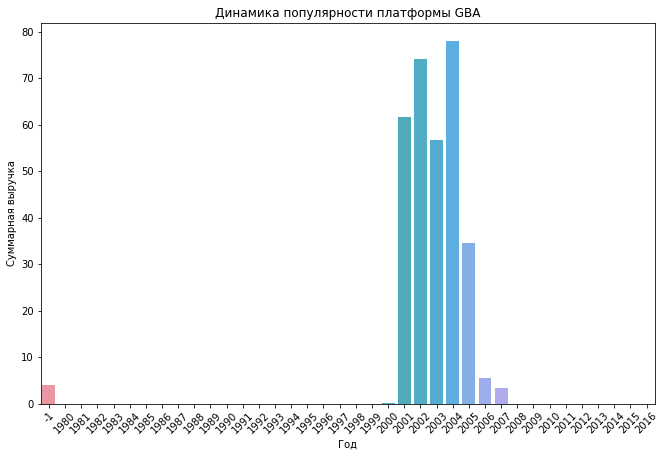

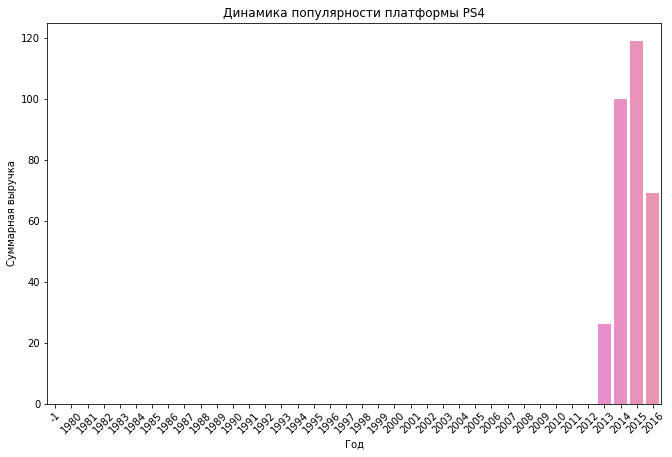

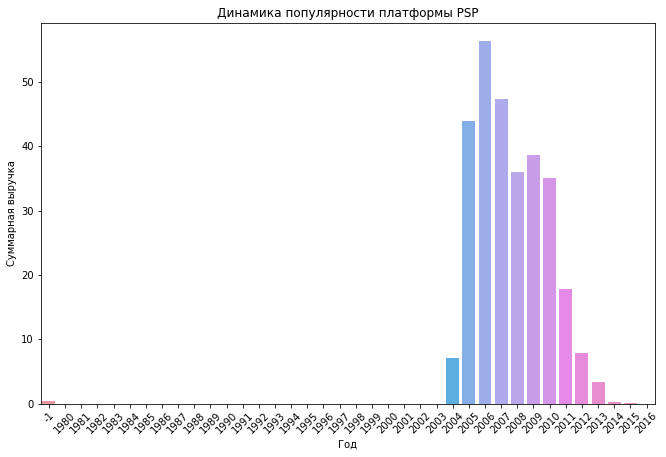

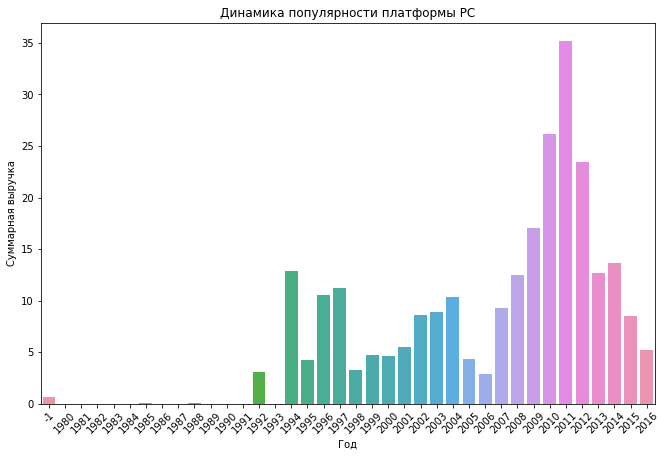

In [17]:
platform_list = data_platform.loc[0:9, 'platform']
for platform in platform_list:
    platform_data = data.query('platform == @platform')
    platform_data = platform_data.pivot_table(index='year_of_release', values='total_profit', aggfunc='sum')
    platform_data = platform_data.reset_index()
    sns.barplot(data=platform_data, x='year_of_release', y='total_profit')\
        .set(xlabel='Год', ylabel='Суммарная выручка', title='Динамика популярности платформы ' + platform);
    plt.xticks(rotation=45);
    plt.show()


Что-то модно, что-то вышло из моды, а что-то вечно. Например, игры на ПК. Пик их популярности пришелся на 2011 год, но они все-таки не пропадают совсем. Интересно, что популярность игр на ПК уже падала в 2006 году. А потом снова начала расти. И последний цикл популярности игр на ПК дублирует распределение по всем остальным платформам. Цикл жизни игровых платформ составляет 10 лет. После 10 лет им на замену приходят новые, более актуальные модели. 

С учетом того, что мы будем строить прогноз на 2017 год, нас интересуют только данные за последние 10 лет. Возьмем данные с 2007 года. Данные за прошлые годы в анализе учитывать не будем. 

In [18]:
data['year_of_release'] = data['year_of_release'].astype(int)
data_new = data.query('year_of_release >= 2007').reset_index(drop=True)
data_new['year_of_release'] = data_new['year_of_release'].astype('category')
data_new.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_profit
0,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
1,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
2,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
3,Wii Fit,Wii,2007,Sports,8.92,8.03,3.60,2.15,80.0,7.7,E,22.70
4,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82


Посмотрим, какие платформы лидируют по продажам в последние годы. 

In [19]:
data_platform_new = data_new.groupby('platform').agg(total_profit=('total_profit', 'sum'))\
    .sort_values(by='total_profit', ascending=False)\
    .reset_index()
data_platform_new

,platform,total_profit
0,PS3,913.56
1,X360,905.60
2,Wii,763.12
3,DS,537.04
4,PS4,314.14
5,3DS,258.53
6,PSP,186.39
7,PC,163.61
8,PS2,163.44
9,XOne,159.32


За последние 10 лет явных лидеров по продажам два - PS3 и X360. Догоняет их Wii и DS. Посмотрим, что происходит с этими платформами в текущем периоде. Спрос на них растет или падает? На какие платформы можно делать ставки в предстоящем периоде? Возьмем все платформы, по которым была хоть какая-то выручка, потому что некоторые из них могут только начинать раскачиваться, а значит, могут войти в пик в ближайшее время (при этом они еще не успели попасть в топ-10 по выручке).

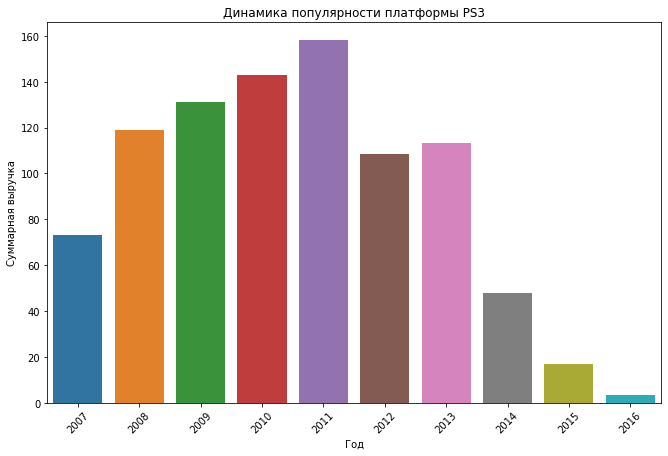

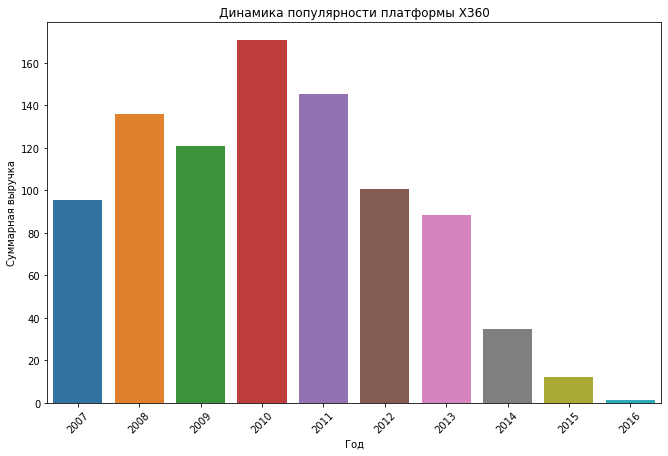

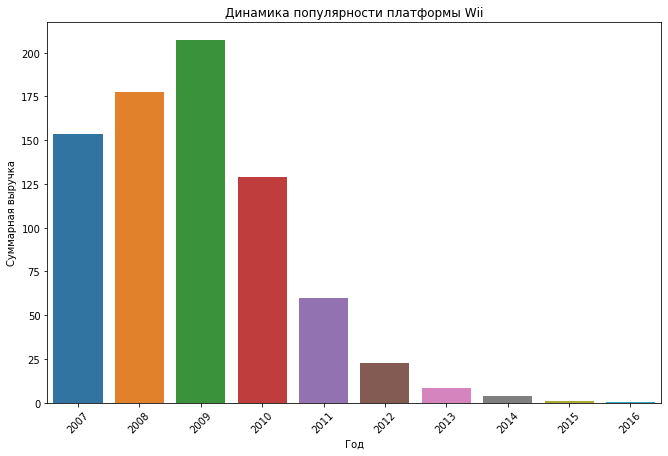

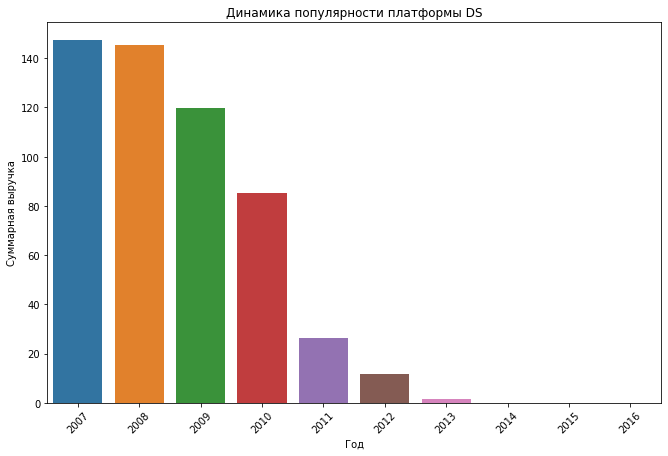

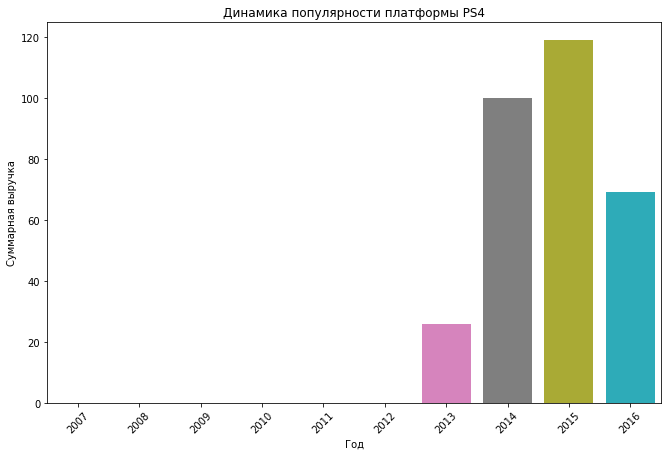

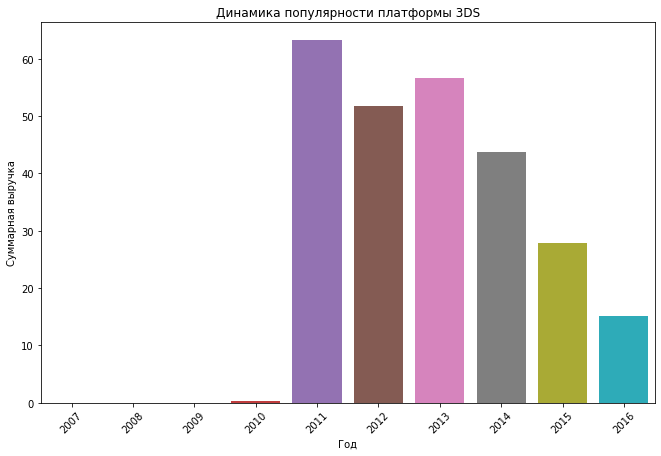

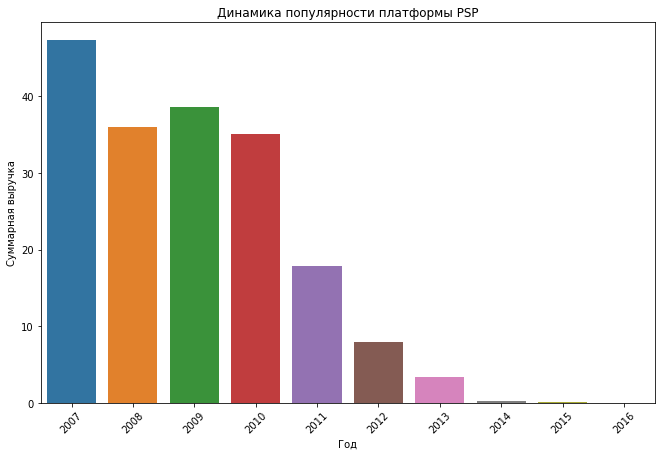

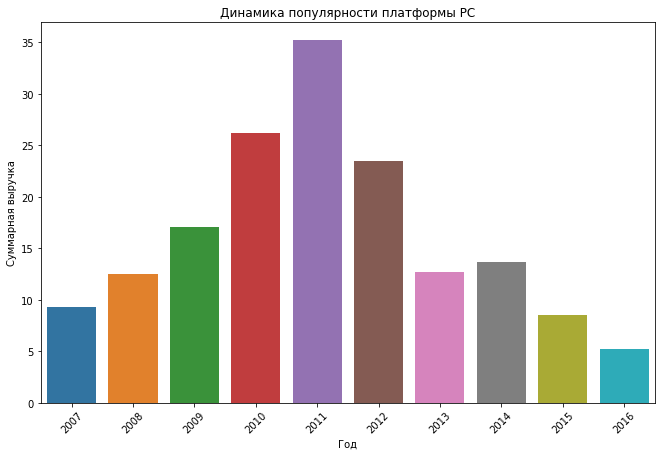

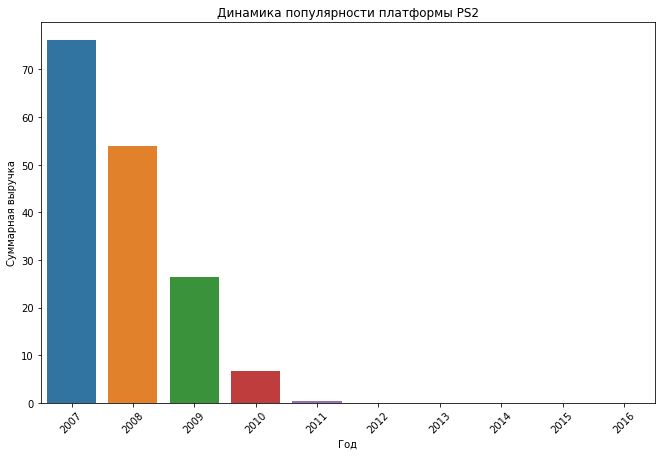

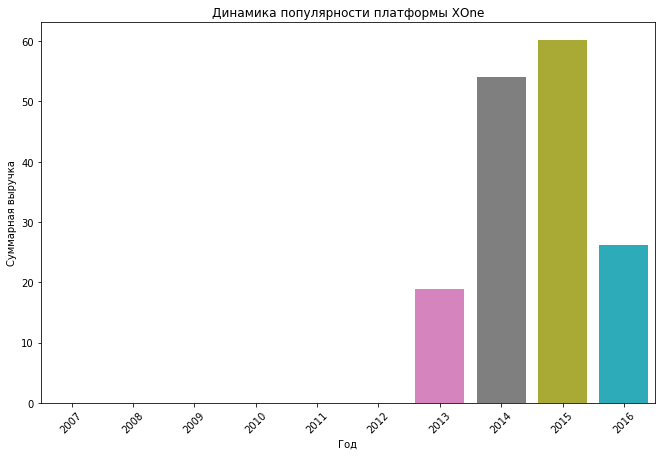

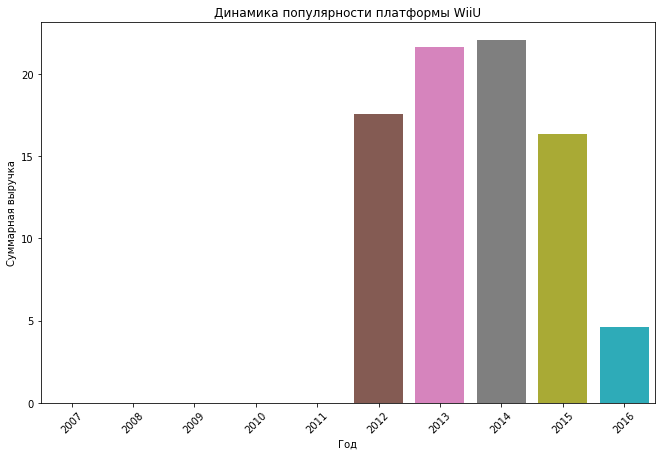

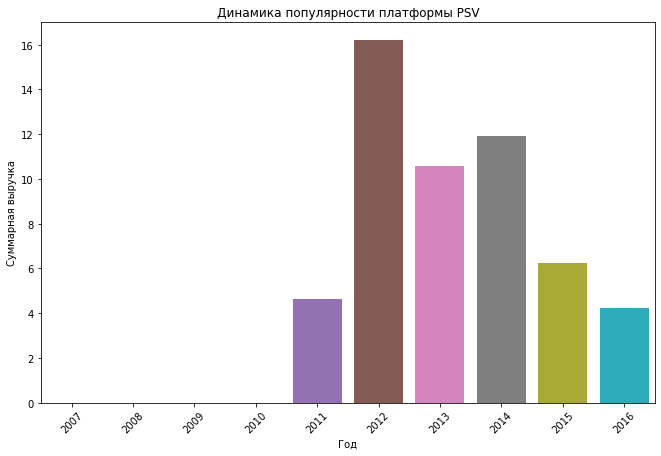

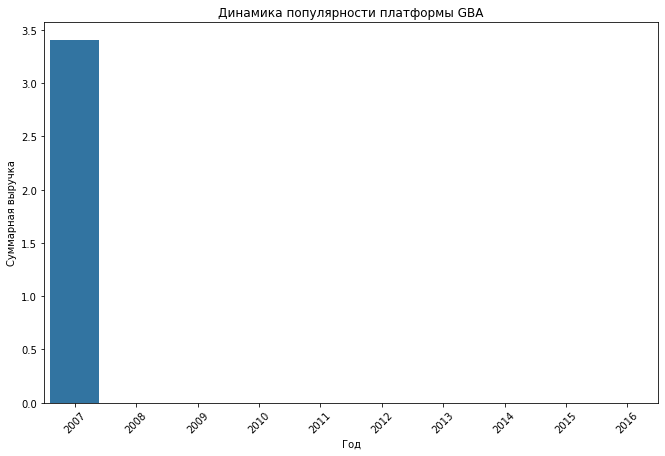

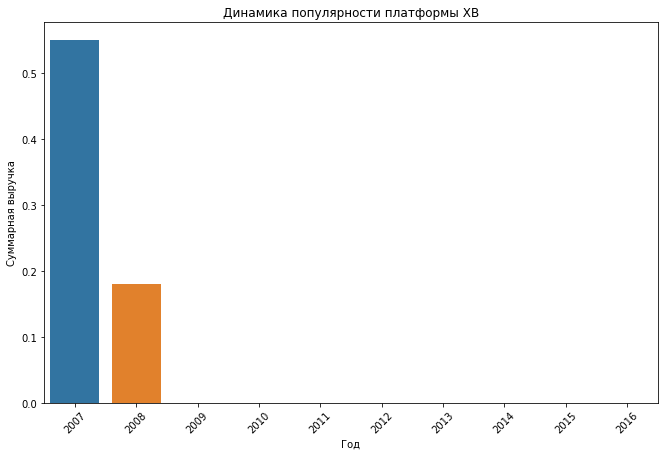

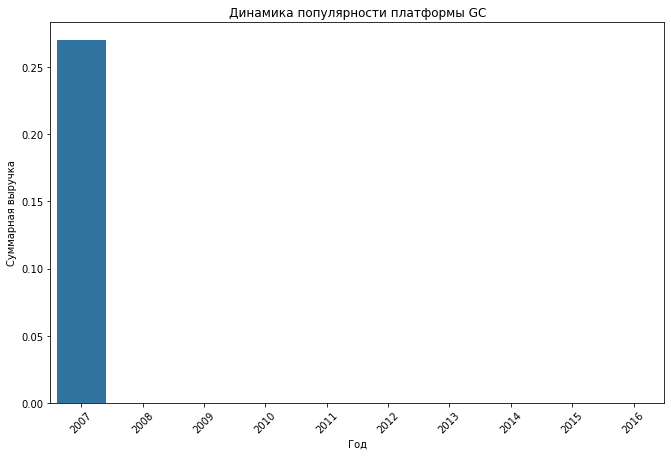

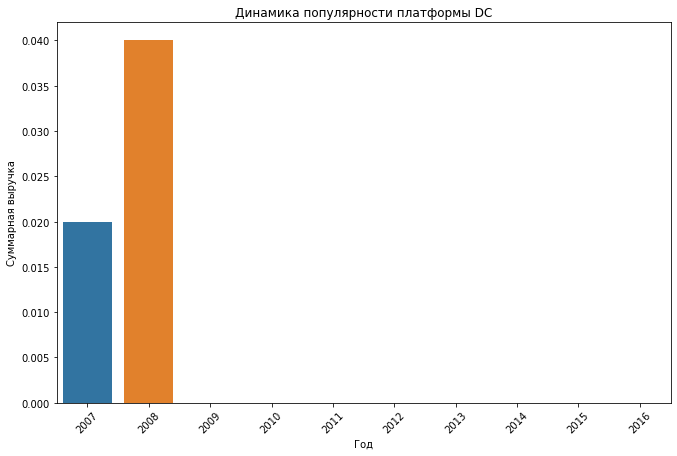

In [20]:
platform_list_new = data_platform_new.loc[0:15, 'platform']
for platform in platform_list_new:
    platform_data_new = data_new.query('platform == @platform')
    platform_data_new = platform_data_new.pivot_table(index='year_of_release', values='total_profit', aggfunc='sum')
    platform_data_new = platform_data_new.reset_index()
    sns.barplot(data=platform_data_new, x='year_of_release', y='total_profit')\
        .set(xlabel='Год', ylabel='Суммарная выручка', title='Динамика популярности платформы ' + platform);
    plt.xticks(rotation=45);
    plt.show()


Многие популярные платформы уже отжили свое. При этом популярность большинства платформ идет на спад. Видимо, новые платформы должны появиться в ближайшее время, потому что текущие уже не так интересны пользователям. Можно предположить, что основные ставки имеет смысл делать на PS4 и XOne, потому что выручки по ним превышают выручки по остальным платформам, несмотря на отрицательную динамику. Построим график, на котором увидим сравнение выручек по площадкам за 2015 и 2016 годы. 

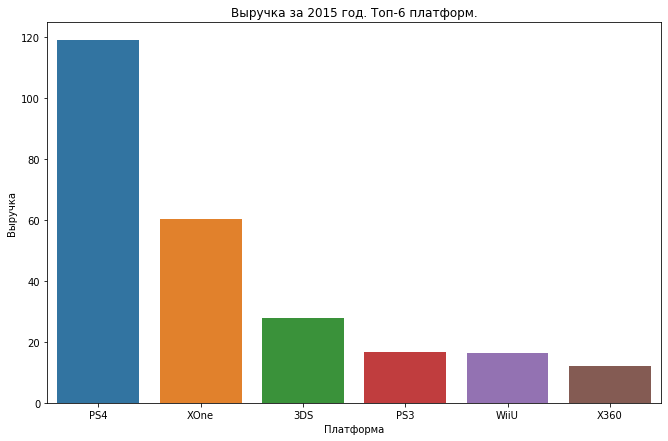

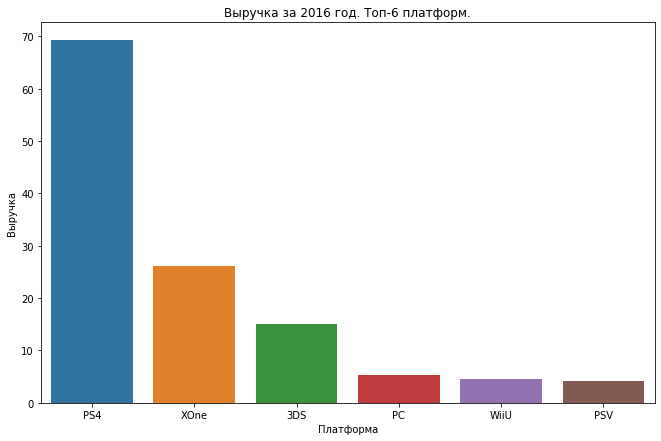

In [21]:
data_2015 = data_new.query('year_of_release == 2015')\
    .groupby('platform').agg(total_profit=('total_profit', 'sum'))\
    .sort_values(by='total_profit', ascending=False)\
    .reset_index()\
    .loc[0:5]
data_2015['platform'] = data_2015['platform'].astype('object')
data_2016 = data_new.query('year_of_release == 2016')\
    .groupby('platform').agg(total_profit=('total_profit', 'sum'))\
    .sort_values(by='total_profit', ascending=False)\
    .reset_index()\
    .loc[0:5]
data_2016['platform'] = data_2016['platform'].astype('object')

sns.barplot(x='platform', y='total_profit', data=data_2015)\
    .set(xlabel='Платформа', ylabel='Выручка', title='Выручка за 2015 год. Топ-6 платформ.');
plt.show();
sns.barplot(x='platform', y='total_profit', data=data_2016)\
    .set(xlabel='Платформа', ylabel='Выручка', title='Выручка за 2016 год. Топ-6 платформ.');
plt.show();

Как мы и думали, основная выручка идем с платформ PS4 и XOne. Основываясь на цикле популярности платформ, эти платформы будут на плаву еще до 2023 года. Относительно неплохую выручку показывает платформа 3DS. И на основании цикла популярности, эта платформа будет не плаву до 2021 года (по крайней мере, будет приносить какую-то выручку). Нельзя списывать со счетов и PC. Выше мы видели, что популярность платформы падает, но однажды с ней такое уже было, однако она успешно вошла в новый цикл популярности. Возможно, это повторится снова? 

Построим «ящик с усами» по глобальным продажам каждой игры с разбивкой по платформам (возьмем потенциально прибыльные платформы: PS4, XOne, 3DS, PC). Ответим на вопросы: велика ли разница в продажах? А в средних продажах на разных платформах? 

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


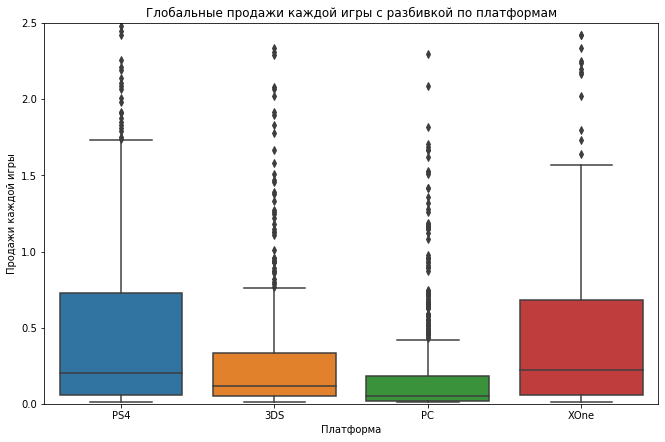

In [22]:
top_4_platform = data_2016.loc[0:3, 'platform']
data_for_box = data_new.query('platform in @top_4_platform')
data_for_box['platform'] = data_for_box['platform'].astype('object')
sns.boxplot(x='platform', y='total_profit', data=data_for_box)\
    .set(xlabel='Платформа', ylabel='Продажи каждой игры', title='Глобальные продажи каждой игры с разбивкой по платформам');
plt.ylim(0, 2.5);

На графике видно, что продажи игр на платформах PS4 и XOne заметно лучше, чем продажи на платформах 3DS и PC. И дело не только в суммарных продажах, но и в продажах каждой игры отдельно. Меньше всего денег производители игр зарабатывают на продаже для PC. Интересно, насколько это как-то связано с наличием пиратского контента для ПК? Или дело только в падающей популярности этой платформы? Это уже вопросы для отдельного исследования. Посмотрим на среднюю выручку с одной игры для каждой платформы. 

In [23]:
for platform in top_4_platform:
    print('Средняя выручка с продаж одной игры для', platform, ': {:.2f} миллионов долларов.'\
      .format(data_for_box.query('platform == @platform')['total_profit'].mean()))

Средняя выручка с продаж одной игры для PS4 : 0.80 миллионов долларов.
Средняя выручка с продаж одной игры для XOne : 0.65 миллионов долларов.
Средняя выручка с продаж одной игры для 3DS : 0.50 миллионов долларов.
Средняя выручка с продаж одной игры для PC : 0.22 миллионов долларов.


Заодно посмотрим и на медианные значения по выручкам.

In [24]:
for platform in top_4_platform:
    print('Медианная выручка с продаж одной игры для', platform, ': {:.2f} миллионов долларов.'\
      .format(data_for_box.query('platform == @platform')['total_profit'].median()))

Медианная выручка с продаж одной игры для PS4 : 0.20 миллионов долларов.
Медианная выручка с продаж одной игры для XOne : 0.22 миллионов долларов.
Медианная выручка с продаж одной игры для 3DS : 0.12 миллионов долларов.
Медианная выручка с продаж одной игры для PC : 0.05 миллионов долларов.


И в средних, и в медианных значениях разница в выручке между двумя лидирующими платформами и двумя "догоняющими" очень заметна. И там, и там, выручка на PC в 4 раза меньше лидирующей PS4. <br>
А вот 3DS не так плоха, как нам казалось по суммарной выручке по всем играм. Возможно, на нее выпускают меньше игр, из-за этого на графиках ранее мы наблюдали довольно большую разницу по суммарной выручке в сравнении с лидирующими платформами. <br>
То же самое касается и XOne. Мединная выручка с продаж у XOne даже больше, чем у PS4, хотя суммарная выручка по всем играм у PS4 значительно выше. Либо на XOne выпускается меньше игр, либо PS4 добирает суммарную выручку длинным хвостом из отдельных популярных и генерирующих выручку игр. 

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Рассматривать будем на примере платформы PS4.

Корреляция между оценкой критиков и продажами: 0.22652606614612347


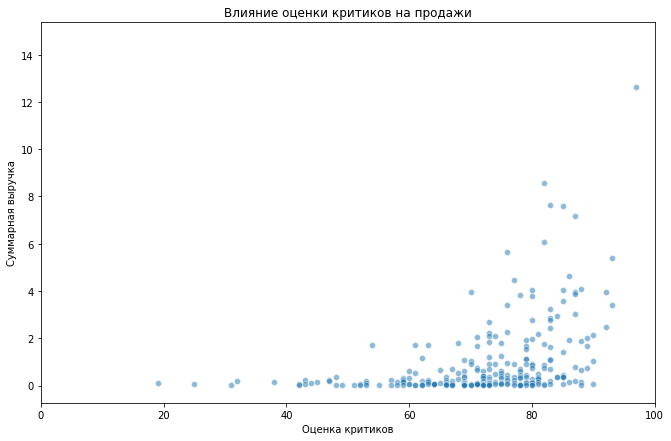

Корреляция между оценкой пользователей и продажами: 0.11721091254217703


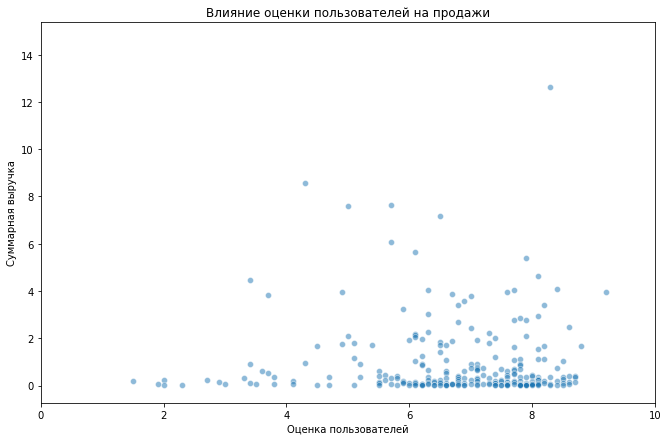

In [25]:
data_ps4 = data_new.query('platform == "PS4"')
print('Корреляция между оценкой критиков и продажами:', data_ps4['total_profit'].corr(data_ps4['critic_score']))
sns.scatterplot(x='critic_score', y='total_profit', data=data_ps4, alpha=0.5)\
    .set(xlabel='Оценка критиков', ylabel='Суммарная выручка', title='Влияние оценки критиков на продажи');
plt.xlim(0,100);
plt.show()
print('Корреляция между оценкой пользователей и продажами:', data_ps4['total_profit'].corr(data_ps4['user_score']))
sns.scatterplot(x='user_score', y='total_profit', data=data_ps4, alpha=0.5)\
    .set(xlabel='Оценка пользователей', ylabel='Суммарная выручка', title='Влияние оценки пользователей на продажи');
plt.xlim(0,10);
plt.show()

Коэффициент корреляции говорит нам о том, что зависимости выручки от оценки, в целом, нет. Мы видим, что у игр с высокими оценками гораздо чаще более высокая выручка, чем у игр с низкими оценками. Однако, достаточное количество игр с высокими оценками приносят доход не выше игр с низкими оценками. А это значит, что высокие оценки критиков или пользователей не гарантируют высокого дохода с игры, хотя и повышают на это шансы. 

Проверим, верно ли это для второй популярной платормы - XOne. 

Корреляция между оценкой критиков и продажами: 0.27378217261702115


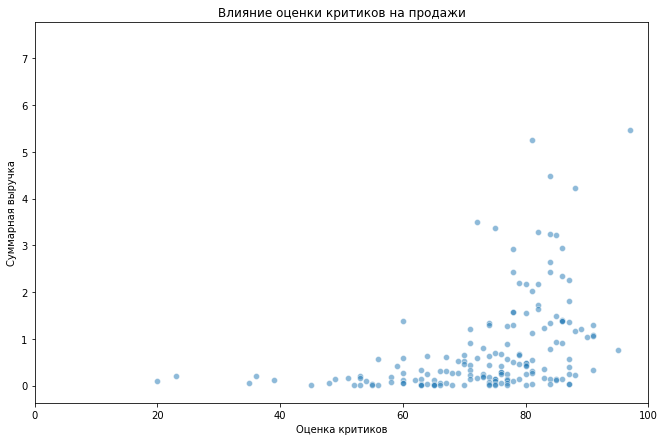

Корреляция между оценкой пользователей и продажами: 0.12629003108011339


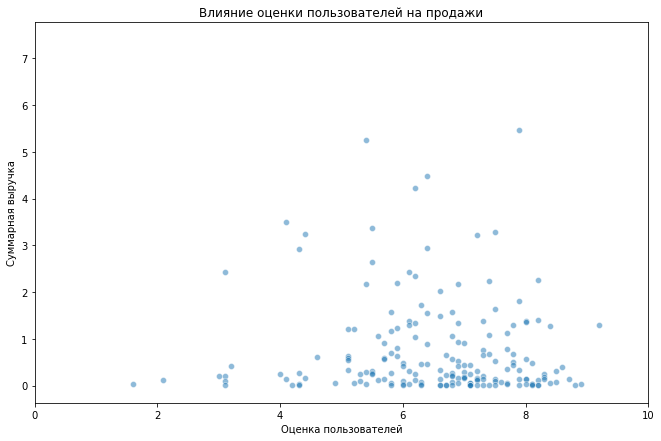

In [26]:
data_xone = data_new.query('platform == "XOne"')
print('Корреляция между оценкой критиков и продажами:', data_xone['total_profit'].corr(data_xone['critic_score']))
sns.scatterplot(x='critic_score', y='total_profit', data=data_xone, alpha=0.5)\
    .set(xlabel='Оценка критиков', ylabel='Суммарная выручка', title='Влияние оценки критиков на продажи');
plt.xlim(0,100);
plt.show()
print('Корреляция между оценкой пользователей и продажами:', data_xone['total_profit'].corr(data_xone['user_score']))
sns.scatterplot(x='user_score', y='total_profit', data=data_xone, alpha=0.5)\
    .set(xlabel='Оценка пользователей', ylabel='Суммарная выручка', title='Влияние оценки пользователей на продажи');
plt.xlim(0,10);
plt.show()

То же самое наблюдается и со второй популярной платформой. А значит, эта тенденция общая. 

Посмотрим на общее распределение игр по жанрам. Ответим на вопросы: что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

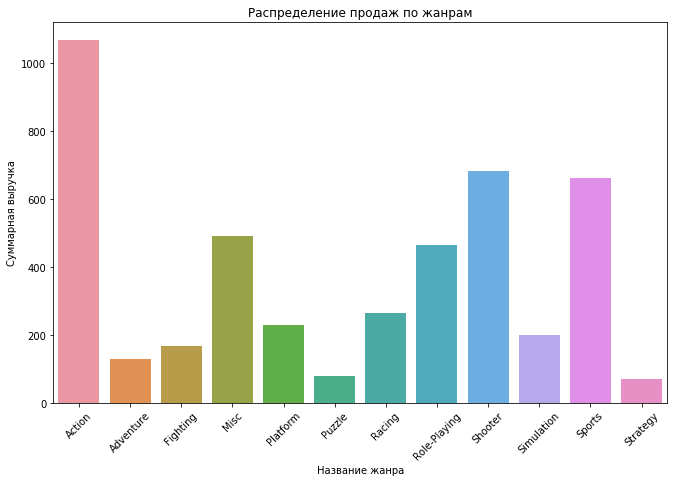

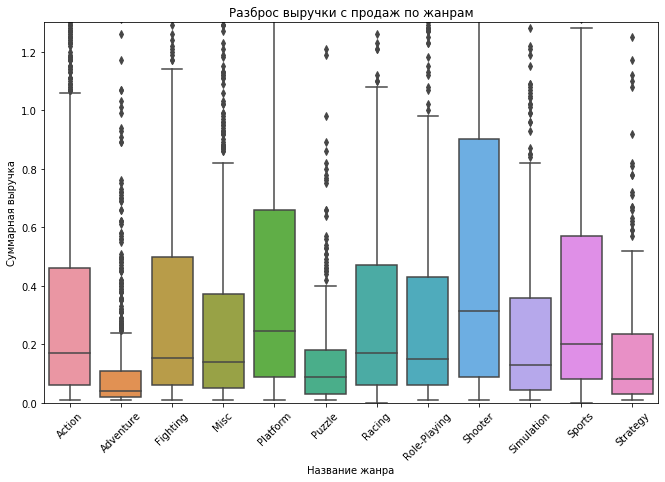

In [27]:
data_genre = data_new.pivot_table(index='genre', values='total_profit', aggfunc='sum')\
    .reset_index()
sns.barplot(x='genre', y='total_profit', data=data_genre)\
    .set(xlabel='Название жанра', ylabel='Суммарная выручка', title='Распределение продаж по жанрам');
plt.xticks(rotation=45);
plt.show()
sns.boxplot(x='genre', y='total_profit', data=data_new)\
    .set(xlabel='Название жанра', ylabel='Суммарная выручка', title='Разброс выручки с продаж по жанрам');
plt.xticks(rotation=45);
plt.ylim(0, 1.3);
plt.show()

Первый график дает нам понять, что индустрия игр в целом зарабатывает больше денег с игр в жанре Action, Shooter и Sports и меньше всего с игр в жанре Puzzle и Strategy. При этом на втором графике четко видно, что прибыльность жанра Action обеспечена не средним доходом с игр, а количеством этих самых игр. Чем больше игр в жанре Action выпускается, тем больше суммарная выручка по этому жанру. Самым прибыльным жанром, судя по второму графику, является Shooter, за ним идут Sports и Platform. Игры в жанре Puzzle и Strategy, как оказалось, приносят больше денег их создателям, чем игры в жанре Adventure. Выручки по всем остальным жанрам находятся приблизительно в одном диапазоне, их можно отнести к средним. 

## Вывод

В результате исследовательского анализа данных мы сделали следующие выводы:
- С 2008 года количество выпускаемых игр падает - игры начали терять свою популярность.
- Цикл жизни игровой платформы в среднем - 10 лет. Но ПК живет уже гораздо дольше. Популярность игр на ПК уже падала, но платформа вошла в новый цикл, который завершается в 2017 году. При этом платформа вряд ли уйдет с рынка. 
- За последние 10 лет явных лидеров по продажам два - PS3 и X360. Догоняет их Wii и DS. 
- Многие популярные платформы уже отжили свое. При этом популярность большинства платформ идет на спад. Видимо, новые платформы должны появиться в ближайшее время. 
- Можно предположить, что основные ставки имеет смысл делать на PS4 и XOne, потому что выручки по ним превышают выручки по остальным платформам, несмотря на отрицательную динамику. Эти платформы будут на плаву еще до 2023 года. 
- Относительно неплохую выручку показывает платформа 3DS. И на основании цикла популярности, эта платформа будет не плаву до 2021 года (по крайней мере, будет приносить какую-то выручку). Нельзя списывать со счетов и PC. 
- Продажи игр на платформах PS4 и XOne заметно лучше, чем продажи на платформах 3DS и PC. И дело не только в суммарных продажах, но и в продажах каждой игры отдельно. Меньше всего денег производители игр зарабатывают на продаже для PC. 
- Платформа 3DS по средней выручке с игр не так плоха, как нам казалось по суммарной выручке по всем играм. Возможно, на нее выпускают меньше игр, из-за этого на графиках ранее мы наблюдали довольно большую разницу по суммарной выручке в сравнении с лидирующими платформами.
- То же самое касается и XOne. Медианная выручка с продаж у XOne даже больше, чем у PS4, хотя суммарная выручка по всем играм у PS4 значительно выше. Либо на XOne выпускается меньше игр, либо PS4 добирает суммарную выручку длинным хвостом из отдельных популярных и генерирующих выручку игр.
- Коэффициент корреляции выручки от оценки критиков/пользователей говорит нам о том, что зависимости выручки от оценок, в целом, нет. Мы видим, что у игр с высокими оценками гораздо чаще более высокая выручка, чем у игр с низкими оценками. Однако, достаточное количество игр с высокими оценками приносят доход не выше игр с низкими оценками. А это значит, что высокие оценки критиков или пользователей не гарантируют высокого дохода с игры, хотя и повышают на это шансы.
- Индустрия игр в целом зарабатывает больше денег с игр в жанре Action, Shooter и Sports и меньше всего с игр в жанре Puzzle и Strategy. При этом прибыльность жанра Action обеспечена не средним доходом с игр, а количеством этих самых игр. Чем больше игр в жанре Action выпускается, тем больше суммарная выручка по этому жанру. 
- Самым прибыльным жанром, в разрезе средней выручки с одной игры, является Shooter, за ним идут Sports и Platform. Игры в жанре Puzzle и Strategy, как оказалось, приносят больше денег их создателям, чем игры в жанре Adventure. Выручки по всем остальным жанрам находятся приблизительно в одном диапазоне, их можно отнести к средним.

## Потрет пользователей по регионам

Определите для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

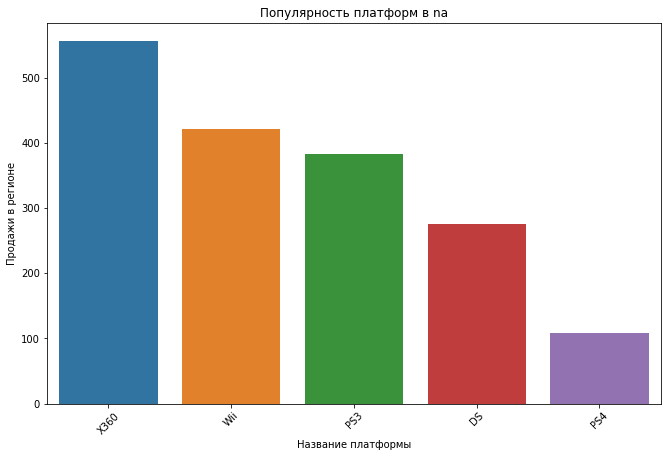

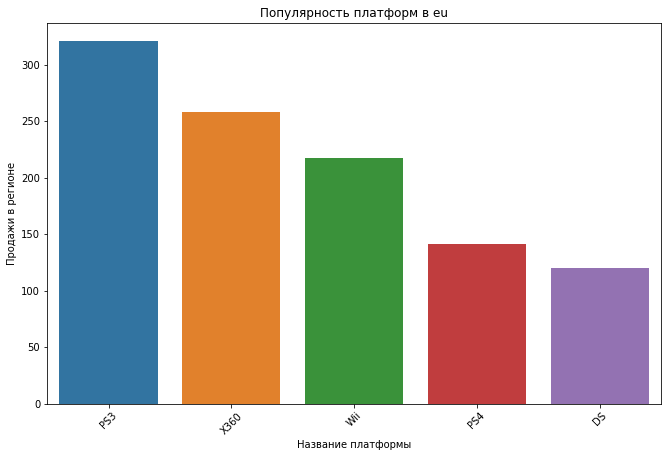

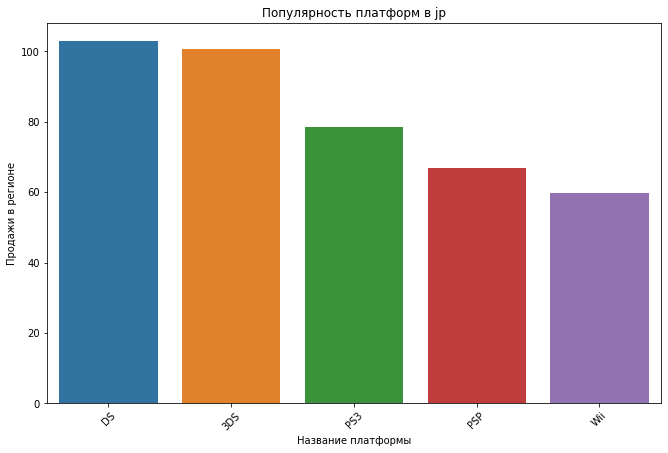

In [28]:
data_platform_person = data_new.pivot_table(index='platform', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')\
    .reset_index()
data_platform_person['platform'] = data_platform_person['platform'].astype('object')

region_list = ['na_sales', 'eu_sales', 'jp_sales']
for region in region_list:
    data_platform_person_region = data_platform_person.sort_values(by=region, ascending=False).reset_index(drop=True).loc[0:4]
    sns.barplot(x='platform', y=region, data=data_platform_person_region)\
        .set(xlabel='Название платформы', ylabel='Продажи в регионе', title='Популярность платформ в ' + region[0:2]);
    plt.xticks(rotation=45);
    plt.show()

Как мы видим, платформы по регионам значительно отличаются. В Северной Америке лидирует X360, в Европе чуть популярнее PS3, а в Японии самые популярные платформы - DS и 3DS. Видимо, в Японии сложилась какая-то своя, обособленная игровая культура. Может, и с жанрами у них похожая ситуация? 

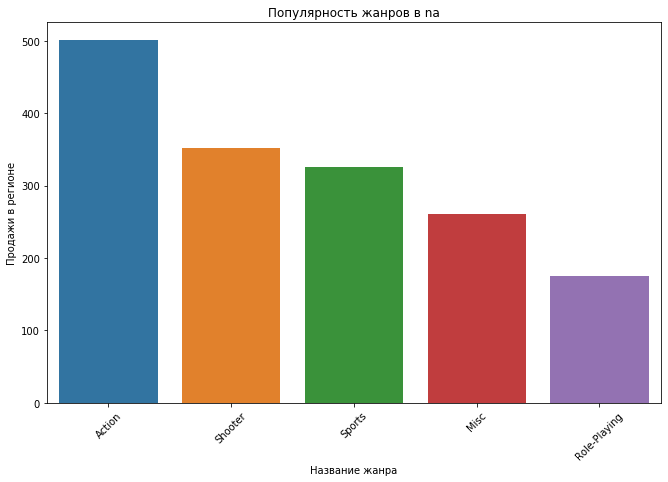

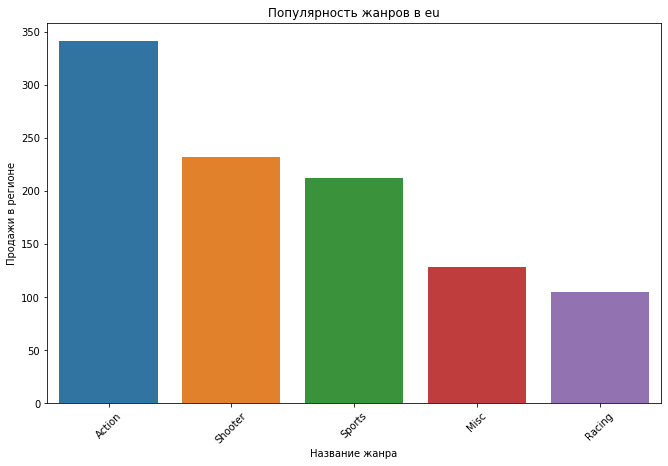

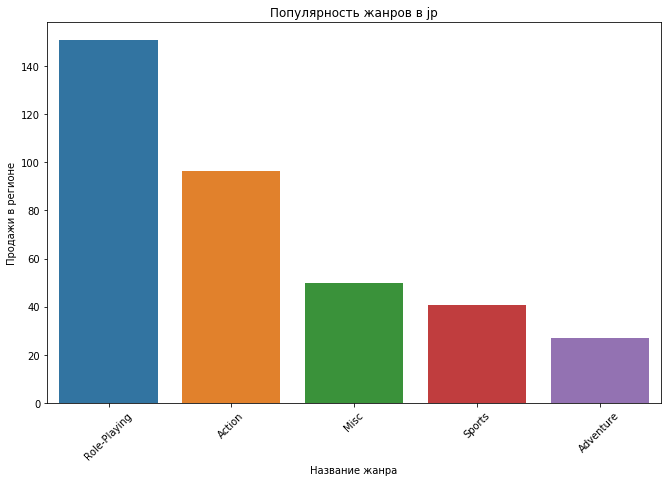

In [29]:
data_genre_person = data_new.pivot_table(index='genre', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')\
    .reset_index()
data_genre_person['genre'] = data_genre_person['genre'].astype('object')

region_list = ['na_sales', 'eu_sales', 'jp_sales']
for region in region_list:
    data_genre_person_region = data_genre_person.sort_values(by=region, ascending=False).reset_index(drop=True).loc[0:4]
    sns.barplot(x='genre', y=region, data=data_genre_person_region)\
        .set(xlabel='Название жанра', ylabel='Продажи в регионе', title='Популярность жанров в ' + region[0:2]);
    plt.xticks(rotation=45);
    plt.show()

Да, и с жанрами у них все по-особенному. Из Топ-5 пропали игры жанра shooter, а возглавили топ игры жанра role-playing. Может, у Японцев другое отношение к проявляемой в шутерах агрессии? 

Оценим влияние рейтинга ESRB на продажи по регионам. 

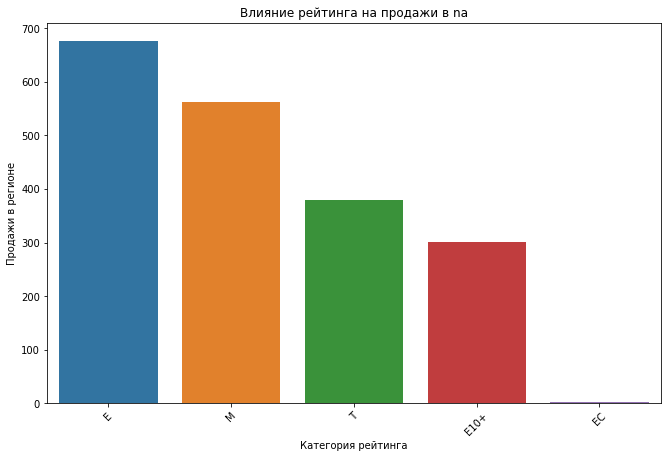

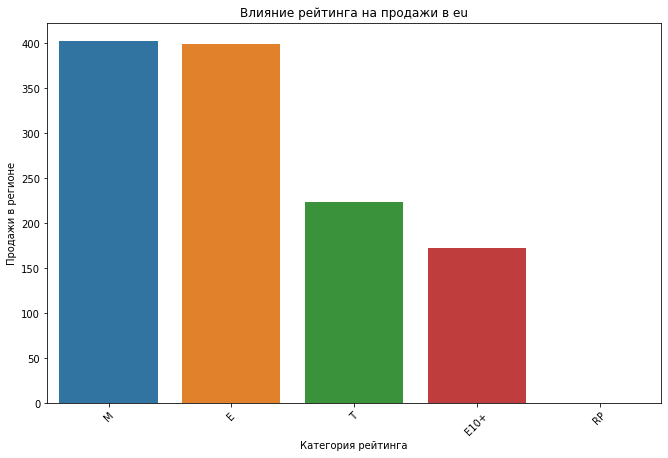

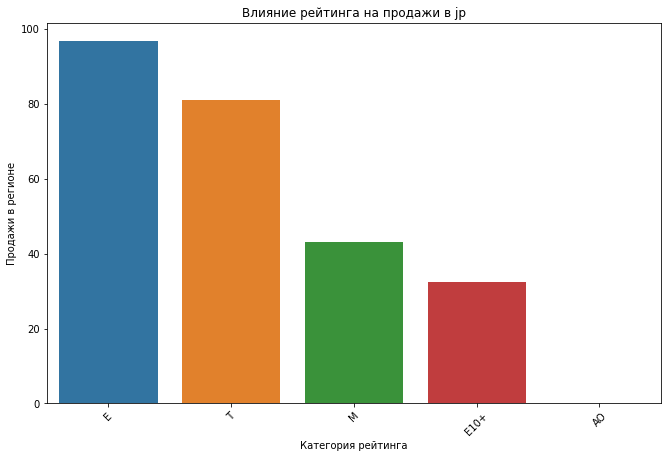

In [30]:
data_rating_person = data_new.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')\
    .reset_index()
data_rating_person['rating'] = data_rating_person['rating'].astype('object')
data_rating_person = data_rating_person.query('rating != "-1"')

region_list = ['na_sales', 'eu_sales', 'jp_sales']
for region in region_list:
    data_rating_person_region = data_rating_person.sort_values(by=region, ascending=False).reset_index(drop=True).loc[0:4]
    sns.barplot(x='rating', y=region, data=data_rating_person_region)\
        .set(xlabel='Категория рейтинга', ylabel='Продажи в регионе', title='Влияние рейтинга на продажи в ' + region[0:2]);
    plt.xticks(rotation=45);
    plt.show()

И тут Япония отличилась. В отличие от Европы и Северной Америки, игры для взрослых (М) оказались аж на третьем месте. Можно предположить, что это напрямую связано с непопулярностью шутеров, ведь они очень часто выпускаются с рейтингом 18+. При этом в Японии, помимо популярных во всех регионах игр для всех возрастов (Е), достаточно популярны игры для подростков (13+ лет, Т). Всё-таки, в Японии своя игровая культура. И ее обязательно нужно учитывать, претендуя на японский рынок. 

## Вывод

По результатам исследования, Япония достаточно сильно отличается от Европы и Северной Америки. 
- В Северной Америке лидирует X360, в Европе чуть популярнее PS3, а в Японии самые популярные платформы - DS и 3DS. Видимо, в Японии сложилась какая-то своя, обособленная игровая культура.
- С жанрами у них тоже все по-особенному. Из Топ-5 пропали игры жанра shooter, а возглавили топ игры жанра role-playing. Может, у Японцев другое отношение к проявляемой в шутерах агрессии?
- В Японии, в отличие от Европы и Северной Америки, игры для взрослых (М) оказались аж на третьем месте. Можно предположить, что это напрямую связано с непопулярностью шутеров, ведь они очень часто выпускаются с рейтингом 18+. При этом в Японии, помимо популярных во всех регионах играх для всех возрастов (Е), достаточно популярны игры для подростков (13+ лет, Т). Всё-таки, в Японии своя игровая культура. И ее обязательно нужно учитывать, претендуя на японский рынок. 

## Статистический анализ данных

Проверим гипотезы:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

**Н0**: среднее user_score платформы XOne == среднему user_score платформы PC<br>
**Н1**: среднее user_score платформы XOne != (больше или меньше) среднему user_score платформы PC

In [31]:
data_xone = data_new.query('platform == "XOne" and user_score >= 0')
data_pc = data_new.query('platform == "PC" and user_score >= 0')

Предварительно посмотрим, на описание распределения значений по выборкам, чтобы убедиться, что дисперсия не сильно отличается.

In [32]:
data_xone['user_score'].describe()

count    182.000000
mean       6.521429
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64

In [33]:
data_pc['user_score'].describe()

count    582.000000
mean       6.773024
std        1.524593
min        1.400000
25%        5.900000
50%        7.100000
75%        8.000000
max        9.300000
Name: user_score, dtype: float64

Стандартные отклонения не равны, а дисперсия (стандартное отклонение в квадрате) будет отличаться несколько сильнее, будем учитывать это при проверке гипотез. Средние значения очень близки. <br>
Перейдем к проверке гипотез.
Пороговое значение alpha зададим 0.05.

In [34]:
alpha = 0.05
result = st.ttest_ind(
    data_xone['user_score'],
    data_pc['user_score'],
    equal_var=False)
print('p-значение = ', result.pvalue)
if (result.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение =  0.037253715630861925
Отвергаем нулевую гипотезу


### Вывод

Несмотря на такие похожие выборки, мы отвергаем нулевую гипотезу. А значит, допускаем возможность того, что средние пользователеские рейтинги платформ Xbox One и PC не одинаковые. 

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

**Н0**: среднее user_score жанра Action == среднему user_score жанра Sports<br>
**Н1**: среднее user_score жанра Action != (больше или меньше) среднему user_score жанра Sports

In [35]:
data_action = data_new.query('genre == "Action" and user_score >= 0')
data_sport = data_new.query('genre == "Sports" and user_score >= 0')

Предварительно посмотрим, на описание распределения значений по выборкам, чтобы убедиться, что дисперсия не сильно отличается.

In [36]:
data_action['user_score'].describe()

count    1232.000000
mean        6.839205
std         1.349596
min         1.600000
25%         6.100000
50%         7.100000
75%         7.800000
max         9.500000
Name: user_score, dtype: float64

In [37]:
data_sport['user_score'].describe()

count    591.000000
mean       6.308629
std        1.675924
min        0.200000
25%        5.400000
50%        6.700000
75%        7.600000
max        9.200000
Name: user_score, dtype: float64

Как и в гипотезе выше, стандартное отклонение отличается незначительно, но это будет заметнее на дисперсии. Так же близки и средние значения, но чуть более значительно отличаются медианные значения.<br>
Перейдем к проверке гипотез. Пороговое значение alpha зададим 0.05.

In [38]:
alpha = 0.05
result = st.ttest_ind(
    data_action['user_score'],
    data_sport['user_score'],
    equal_var=False)
print('p-значение = ', result.pvalue)
if (result.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение =  3.064098789244688e-11
Отвергаем нулевую гипотезу


### Вывод

И здесь, в таких похожих выборках, нулевую гипотезу мы тоже отвергаем, а значит, допускаем возможность того, что Средние пользовательские рейтинги жанров Action и Sports разные.

## Вывод

Обе гипотезы мы отвергнули и допустили возможность того, что:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

# Общий вывод

Мы проанализировали исторические данные о продажах игр, оценках пользователей и экспертов, жанрам и платформам. Ниже представлены кратко выводы по всем этапам анализа данных и итоговые рекомендации по планированию рекламных кампаний. 

- С 2008 года количество выпускаемых игр падает - игры начали терять свою популярность.
- Цикл жизни игровой платформы в среднем - 10 лет. Но ПК живет уже гораздо дольше. Популярность игр на ПК уже падала, но платформа вошла в новый цикл, который завершается в 2017 году. При этом платформа вряд ли уйдет с рынка. 
- За последние 10 лет явных лидеров по продажам два - PS3 и X360. Догоняет их Wii и DS. 
- Многие популярные платформы уже отжили свое. При этом популярность большинства платформ идет на спад. Видимо, новые платформы должны появиться в ближайшее время. 
- Можно предположить, что основные ставки имеет смысл делать на PS4 и XOne, потому что выручки по ним превышают выручки по остальным платформам, несмотря на отрицательную динамику. Эти платформы будут на плаву еще до 2023 года. 
- Относительно неплохую выручку показывает платформа 3DS. И на основании цикла популярности, эта платформа будет не плаву до 2021 года (по крайней мере, будет приносить какую-то выручку). Нельзя списывать со счетов и PC. 
- Продажи игр на платформах PS4 и XOne заметно лучше, чем продажи на платформах 3DS и PC. И дело не только в суммарных продажах, но и в продажах каждой игры отдельно. Меньше всего денег производители игр зарабатывают на продаже для PC. 
- Платформа 3DS по средней выручке с игр не так плоха, как нам казалось по суммарной выручке по всем играм. Возможно, на нее выпускают меньше игр, из-за этого на графиках ранее мы наблюдали довольно большую разницу по суммарной выручке в сравнении с лидирующими платформами.
- То же самое касается и XOne. Медианная выручка с продаж у XOne даже больше, чем у PS4, хотя суммарная выручка по всем играм у PS4 значительно выше. Либо на XOne выпускается меньше игр, либо PS4 добирает суммарную выручку длинным хвостом из отдельных популярных и генерирующих выручку игр.
- Коэффициент корреляции выручки от оценки критиков/пользователей говорит нам о том, что зависимости выручки от оценок, в целом, нет. Мы видим, что у игр с высокими оценками гораздо чаще более высокая выручка, чем у игр с низкими оценками. Однако, достаточное количество игр с высокими оценками приносят доход не выше игр с низкими оценками. А это значит, что высокие оценки критиков или пользователей не гарантируют высокого дохода с игры, хотя и повышают на это шансы.
- Индустрия игр в целом зарабатывает больше денег с игр в жанре Action, Shooter и Sports и меньше всего с игр в жанре Puzzle и Strategy. При этом прибыльность жанра Action обеспечена не средним доходом с игр, а количеством этих самых игр. Чем больше игр в жанре Action выпускается, тем больше суммарная выручка по этому жанру. 
- Самым прибыльным жанром, в разрезе средней выручки с одной игры, является Shooter, за ним идут Sports и Platform. Игры в жанре Puzzle и Strategy, как оказалось, приносят больше денег их создателям, чем игры в жанре Adventure. Выручки по всем остальным жанрам находятся приблизительно в одном диапазоне, их можно отнести к средним.
- В Северной Америке лидирует X360, в Европе чуть популярнее PS3, а в Японии самые популярные платформы - DS и 3DS. Видимо, в Японии сложилась какая-то своя, обособленная игровая культура.
- С жанрами у них тоже все по-особенному. Из Топ-5 пропали игры жанра shooter, а возглавили топ игры жанра role-playing. Может, у Японцев другое отношение к проявляемой в шутерах агрессии?
- В Японии, в отличие от Европы и Северной Америки, игры для взрослых (М) оказались аж на третьем месте. Можно предположить, что это напрямую связано с непопулярностью шутеров, ведь они очень часто выпускаются с рейтингом 18+. При этом в Японии, помимо популярных во всех регионах играх для всех возрастов (Е), достаточно популярны игры для подростков (13+ лет, Т). Всё-таки, в Японии своя игровая культура. И ее обязательно нужно учитывать, претендуя на японский рынок.

Мы сформулировали и отвергли обе гипотезы, и допустили, что:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Исходя из этого, можно рекомендовать **в предстоящем году делать акцент на**:
- Платформы PS4 и Xone;
- Жанры Action, Shooter и Sports.

Дополнительные комментарии:
- Игры с более высокими оценками могут принести больше выручки, но это не гарантированно. Причем не важно, пользовательские это оценки или профессиональные.  
- Игры с рейтингом ESRB = E (для всех возрастов) или с М (для взрослых) приносят больше продаж. Можно смело ориентироваться на взрослое население и не делать ставок на детские игры. 

Если бы мы ориентировались на **японский рынок**, акцент стоило бы делать на:
- Платформы DS и DS3;
- Жанр role-playing. 

Дополнительные комментарии:
- На японском рынке стоит ориентироваться на игры с рейтингом ESRB = E (для всех возрастов) или Т (для подростков), и меньше делать ставок на игры для взрослых (М). 